<h2 style='color:blue' align="center">Decision Tree Classification</h2>

In [1]:
import numpy as np
import pandas as pd

In [2]:
dt_df = pd.read_csv("salaries.csv")
dt_df.head()

,company,job,degree,more_than_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
# Checking for null values
dt_df.isnull().sum()

company           0
job               0
degree            0
more_than_100k    0
dtype: int64

In [4]:
# Checking the shape of the dataframe
dt_df.shape

(16, 4)

In [5]:
# checking for number of unique values in the target
dt_df.more_than_100k.nunique()

2

In [6]:
# Calculating ratio of target to records
ratio = dt_df['more_than_100k'].nunique()/dt_df.shape[0]
print(f'ratio = {np.round(ratio*100,2)} %')

ratio = 12.5 %


In [7]:
# Extracting the independent variable (inputs)
inputs = dt_df.drop('more_than_100k',axis='columns')

In [8]:
# Extracting the dependent variable (target)
target = dt_df['more_than_100k']

In [9]:
# Checking the dataframe
dt_df.head()

,company,job,degree,more_than_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [10]:
# Transforming the word fields to numbers
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [11]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [12]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [13]:
# Droping the Word columns
inputs_n = inputs.drop(['company','job','degree'],axis='columns')

In [14]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [15]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: more_than_100k, dtype: int64

In [70]:
# Importing the decision tree classifier
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [87]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
model = RandomForestClassifier()

In [88]:
# importing the train_test split
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
                                                inputs_n, target, train_size=0.8)

In [93]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [103]:
model.score(X_train, y_train)

1.0

In [104]:
model.score(X_test,y_test)

1.0

In [105]:
model.base_estimator_

C:\Users\Dr_Sam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


DecisionTreeClassifier()

In [109]:
model.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=505794871),
 DecisionTreeClassifier(max_features='sqrt', random_state=1901434044),
 DecisionTreeClassifier(max_features='sqrt', random_state=836621344),
 DecisionTreeClassifier(max_features='sqrt', random_state=403928145),
 DecisionTreeClassifier(max_features='sqrt', random_state=2024340225),
 DecisionTreeClassifier(max_features='sqrt', random_state=627187717),
 DecisionTreeClassifier(max_features='sqrt', random_state=1753318617),
 DecisionTreeClassifier(max_features='sqrt', random_state=626096669),
 DecisionTreeClassifier(max_features='sqrt', random_state=1662924925),
 DecisionTreeClassifier(max_features='sqrt', random_state=133308497),
 DecisionTreeClassifier(max_features='sqrt', random_state=2000935716),
 DecisionTreeClassifier(max_features='sqrt', random_state=828666014),
 DecisionTreeClassifier(max_features='sqrt', random_state=236182490),
 DecisionTreeClassifier(max_features='sqrt', random_state=1306808860),
 DecisionTreeC

In [108]:
len(model.estimators_)

100

**Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?**

In [22]:
model.predict([[2,1,0]])

C:\Users\Dr_Sam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

**Is salary of Google, Computer Engineer, Masters degree > 100 k ?**

In [23]:
model.predict([[2,1,1]])

C:\Users\Dr_Sam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

## Binary Classification with Logistic Regression

### Predicting if a person would buy life insurnace based on his age using logistic regression

In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [25]:
lg_df = pd.read_csv("insurance_data.csv")
lg_df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [26]:
# Checking the shape of the dataframe
lg_df.shape

(27, 2)

In [27]:
# checking for number of unique values in the target
lg_df.bought_insurance.nunique()

2

In [28]:
# Calculating ratio of target to records
ratio = lg_df['bought_insurance'].nunique()/lg_df.shape[0]
print(f'ratio = {np.round(ratio*100,2)} %')

ratio = 7.41 %


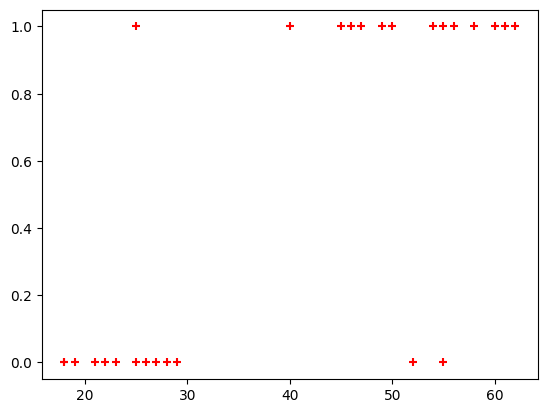

In [30]:
# Plotting the graph to see what is best
plt.scatter(lg_df.age,lg_df.bought_insurance,marker='+',color='red')

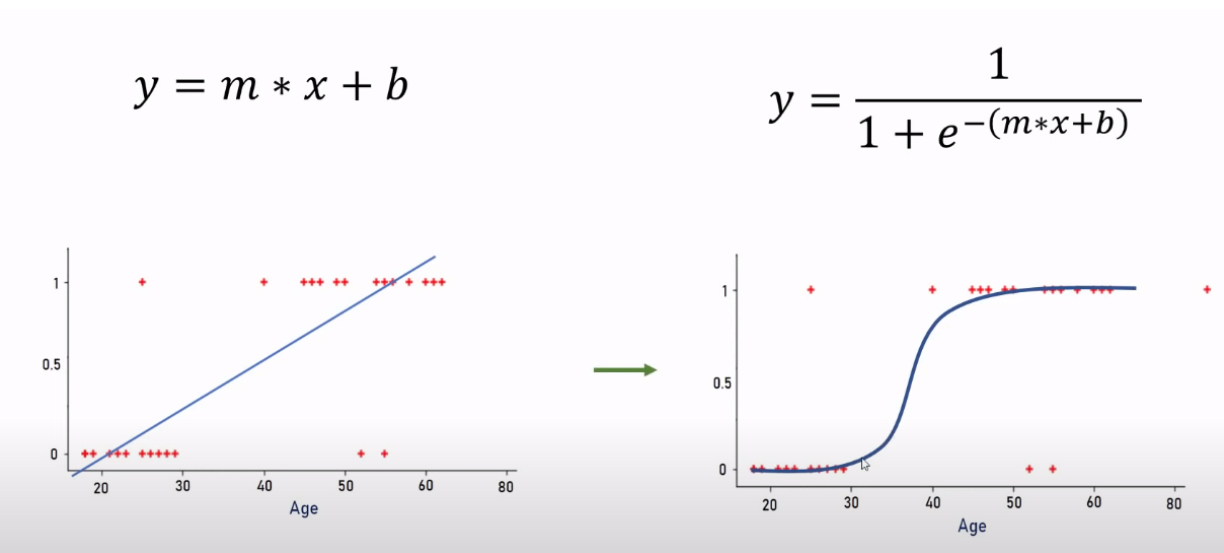

In [ ]:
# It is obvious that logistic regression will be the best fit and not regression

In [31]:
# importing the train_test split
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
                                                lg_df[['age']],lg_df.bought_insurance,train_size=0.75)

In [35]:
X_test

,age
10,18
14,49
26,23
22,40
23,45
2,47
13,29


In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [37]:
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
X_test

,age
10,18
14,49
26,23
22,40
23,45
2,47
13,29


In [39]:
y_predicted = model.predict(X_test)

In [40]:
# probability of those who will not buy (first column), and will buy (second column)
model.predict_proba(X_test)

array([[0.94108946, 0.05891054],
       [0.29944725, 0.70055275],
       [0.89907548, 0.10092452],
       [0.55015873, 0.44984127],
       [0.40547294, 0.59452706],
       [0.35061847, 0.64938153],
       [0.81550199, 0.18449801]])

In [41]:
model.score(X_test,y_test)

0.8571428571428571

## Lets defined sigmoid function now and do the math with hand

In [42]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [43]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [44]:
age = 35
prediction_function(age)

0.4850044983805899

#### 0.485 is less than 0.5 which means person with 35 age will not buy insurance


**Exercise: Build decision tree model to predict survival based on certain parameters**

CSV file is attached with this notebook
##### In this file using following columns build a model to predict if person would survive or not,

1. Pclass
1. Sex
1. Age
1. Fare

##### Calculate score of your model

<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model